In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.metrics import Precision, Recall

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings("ignore")

##  1-)Veri setini yükleme

In [3]:
(x_train, y_train), (x_test,y_test)=mnist.load_data()

In [4]:
print("Eğitim seti boyutu: ",x_train.shape,y_train.shape)

Eğitim seti boyutu:  (60000, 28, 28) (60000,)


In [5]:
print("Test seti boyutu: ",x_test.shape,y_test.shape)

Test seti boyutu:  (10000, 28, 28) (10000,)


In [6]:
num_labels=len(np.unique(y_train))
num_labels

10

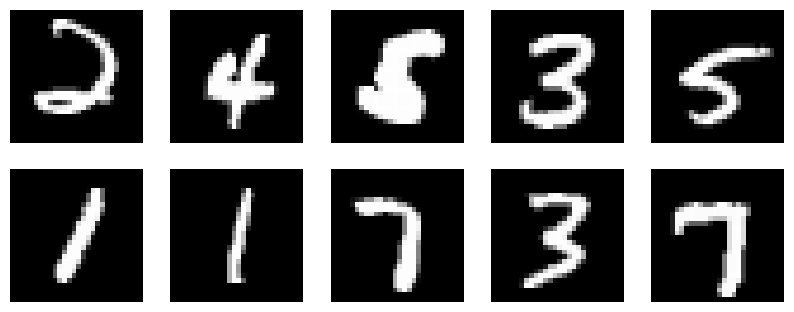

In [7]:
## Veri setinden örnekler
def visualize_img(data, num_samples=10):
    plt.figure(figsize=(10,10))
    random_indices = np.random.choice(len(data), num_samples, replace=False)
    
    for i, idx in enumerate(random_indices):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(data[idx], cmap="gray")
        plt.axis("off")
    
    plt.show()
visualize_img(x_train)

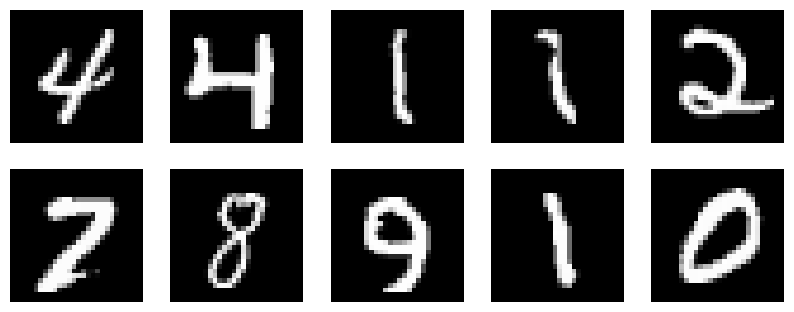

In [8]:
visualize_img(x_train)

## 2-)Veriyi Anlamak

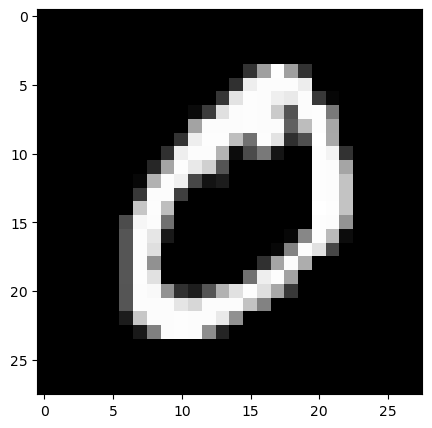

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1], cmap="gray");

*Tüm renkler RGB renklerden oluşur.(Red Green Blue)*
Verisetindeki RGB degerleri inceliyelim

In [12]:
print(x_train[1].shape)
x_train[1][0:7]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
x_train[1][10,10]
#238 beyaza yakın parlak bir renk

238

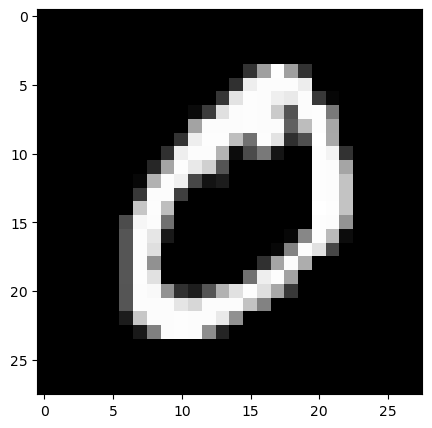

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1], cmap="gray");

In [15]:
x_train[1][5,10]
#siyah

0

In [16]:
x_train[1].mean()

39.661989795918366

In [17]:
x_train[1].sum()

31095

In [18]:
x_train[1][8:20][10:20]

array([[  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

In [19]:
x_train[1][8:20][10:20].mean() 

43.767857142857146

In [20]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    
    width, height = img.shape
    threshold = img.max() / 2.5  # Görselleştirme için bir eşik değeri

    for x in range(width):
        for y in range(height):
            # Her pikseldeki değeri yazdırıyoruz ve kontrasta göre rengi ayarlıyoruz
            color = 'white' if img[x, y] < threshold else 'black'
            ax.annotate(
                str(round(img[x, y], 2)), 
                xy=(y, x),  # Yatay ve dikey koordinatlar
                color=color,
                ha='center',
                va='center'  # Ortalanmış şekilde gösterim
            )
    
    plt.show()

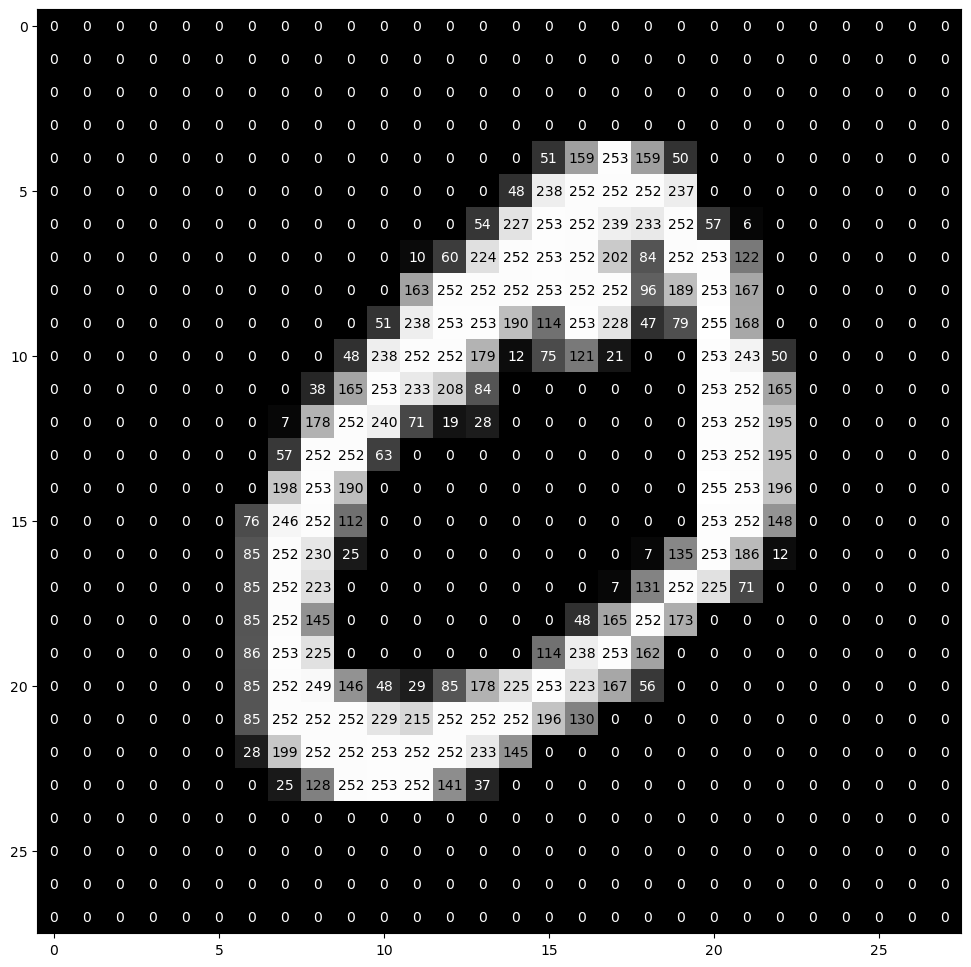

In [21]:
pixel_visualize(x_train[1])

## 3-)Veriyi Hazırlama

****Encoding**** Hedef değişkene uygulayağız

In [24]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [26]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

****Reshaping**** 

In [28]:
image_size=x_train.shape[1]
image_size

28

In [29]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


****Standardization****

In [32]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

## 4-)Modelleme                                                                                                                        

#### Sinir ağı mimarisini tanımlamak.

In [35]:
model = Sequential()

#girdi boyutu
model.add(Flatten(input_shape=(28, 28, 1)))
# Dense katmanlarını ekleme
model.add(Dense(128, activation="relu", name="layer1"))
model.add(Dense(num_labels, activation="softmax", name="output_layer"))


model.compile(loss="categorical_crossentropy",  ##çok sınıflı 
             optimizer="adam",
             metrics=[Precision(),Recall(),"accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Modeli eğitmek

In [37]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8297 - loss: 0.6190 - precision: 0.9286 - recall: 0.7049 - val_accuracy: 0.9432 - val_loss: 0.1955 - val_precision: 0.9576 - val_recall: 0.9314
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9478 - loss: 0.1827 - precision: 0.9613 - recall: 0.9366 - val_accuracy: 0.9605 - val_loss: 0.1369 - val_precision: 0.9692 - val_recall: 0.9518
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9623 - loss: 0.1314 - precision: 0.9715 - recall: 0.9550 - val_accuracy: 0.9678 - val_loss: 0.1119 - val_precision: 0.9747 - val_recall: 0.9621
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.1004 - precision: 0.9787 - recall: 0.9671 - val_accuracy: 0.9686 - val_loss: 0.1001 - val_precision: 0.9736 - val_recall: 0.9650
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0776 - precision: 0.9830 - recall: 0.9744 - val_accuracy: 0.9715 - val_loss: 0.

## 5-)Modeli degerlendirme

In [39]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0261 - precision: 0.9947 - recall: 0.9920 - val_accuracy: 0.9765 - val_loss: 0.0738 - val_precision: 0.9788 - val_recall: 0.9753
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0237 - precision: 0.9951 - recall: 0.9930 - val_accuracy: 0.9771 - val_loss: 0.0791 - val_precision: 0.9795 - val_recall: 0.9758
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9955 - loss: 0.0191 - precision: 0.9962 - recall: 0.9946 - val_accuracy: 0.9756 - val_loss: 0.0790 - val_precision: 0.9782 - val_recall: 0.9739
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 0.0168 - precision: 0.9966 - recall: 0.9954 - val_accuracy: 0.9772 - val_loss: 0.0789 - val_precision: 0.9789 - val_recall: 0.9759
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0147 - precision: 0.9971 - recall: 0.9960 - val_accuracy: 0.9774 - val_loss: 0.

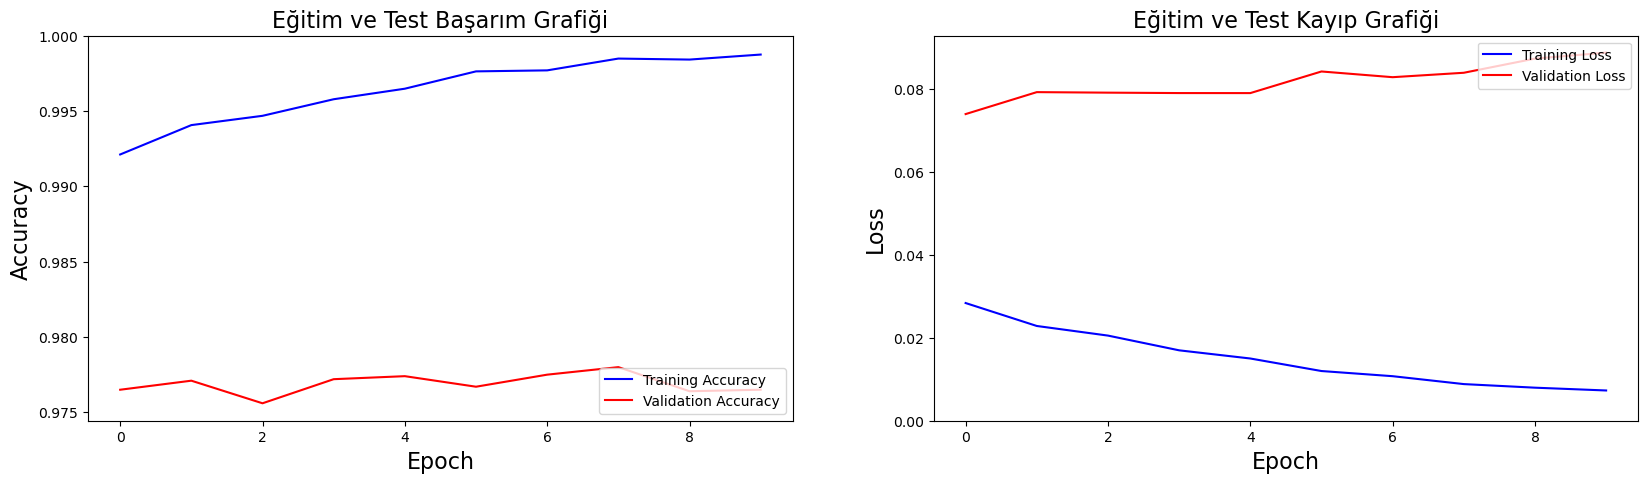

In [40]:
plt.figure(figsize=(20, 5))

# Grafik 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)

# Grafik 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)

plt.show()

In [41]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
 
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))



Test Accuracy: 97.6%

Test Loss: 8.9%

Test Precision: 97.7%

Test Recall: 97.6%


## 6-)Model kaydetmek ve Tahminleme

In [43]:
model.save("mnist_model.h5")

In [44]:
import random
random=random.randint(0,x_test.shape[0])

In [45]:
def prediction(ret=False):
    random_index = random.randint(0, x_test.shape[0] - 1)
    test_image = x_test[random_index]
    
    plt.imshow(test_image.reshape(28, 28), cmap="gray")
    plt.axis('off')  
    plt.show()
    
    test_data = test_image.reshape(1, 28, 28, 1)
    
    probability = model.predict(test_data)
    
    predicted_class = np.argmax(probability)
    
    print(f"Tahmin Edilen Sınıf: {predicted_class} \n")
    print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]} \n")
    print(f"Diğer Sınıfların Olasılık Değerleri: \n{probability}")

    
    if ret==True:
        return predicted_class
    

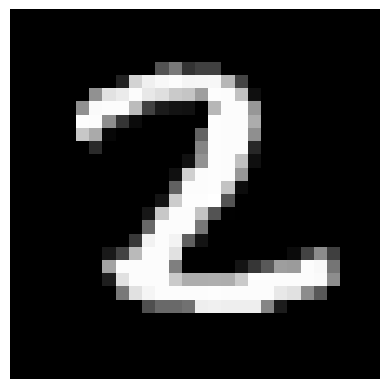

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Tahmin Edilen Sınıf: 2 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9999961853027344 

Diğer Sınıfların Olasılık Değerleri: 
[[2.1456688e-14 1.9934901e-06 9.9999619e-01 7.5939045e-07 1.0315930e-17
  2.0820507e-14 2.3174536e-16 1.9958249e-11 1.0527208e-06 3.0415908e-16]]


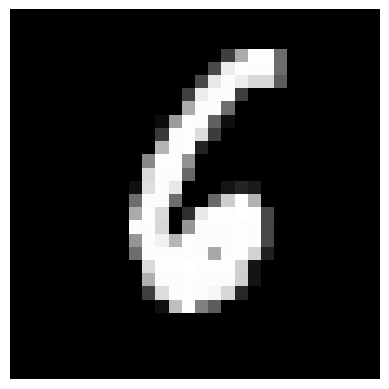

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin Edilen Sınıf: 6 

Tahmin Edilen Sınıfın Olasılık Değeri: 1.0 

Diğer Sınıfların Olasılık Değerleri: 
[[5.7692313e-11 3.4065033e-13 1.7743466e-09 2.3092424e-12 1.6369656e-10
  5.3432210e-08 1.0000000e+00 7.1316965e-17 6.0822590e-11 2.8312604e-15]]


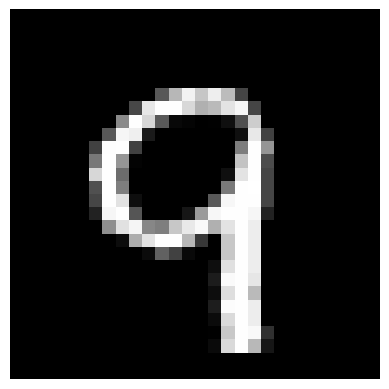

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tahmin Edilen Sınıf: 9 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9999955892562866 

Diğer Sınıfların Olasılık Değerleri: 
[[3.9781334e-12 2.0556910e-13 1.8361035e-09 1.7886208e-08 1.7075915e-06
  7.6377860e-10 4.2534609e-10 3.0460711e-08 2.7399628e-06 9.9999559e-01]]


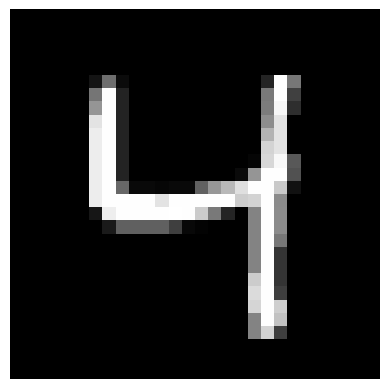

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Tahmin Edilen Sınıf: 4 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.990127444267273 

Diğer Sınıfların Olasılık Değerleri: 
[[3.2183096e-11 3.5927349e-06 6.4793716e-07 1.2760086e-05 9.9012744e-01
  6.7466686e-07 1.2606677e-05 1.3990950e-07 3.8978134e-04 9.4525116e-03]]


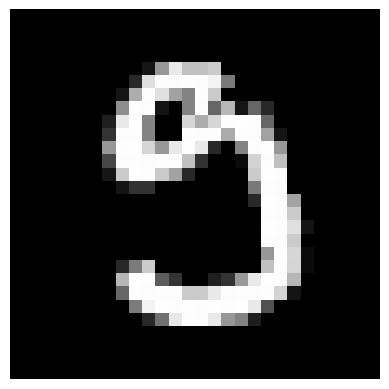

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tahmin Edilen Sınıf: 5 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9667019248008728 

Diğer Sınıfların Olasılık Değerleri: 
[[1.0632630e-05 1.0863738e-08 1.5954918e-04 3.3122677e-02 1.0234708e-14
  9.6670192e-01 3.1606035e-14 3.0221258e-06 3.0058857e-08 2.2290496e-06]]


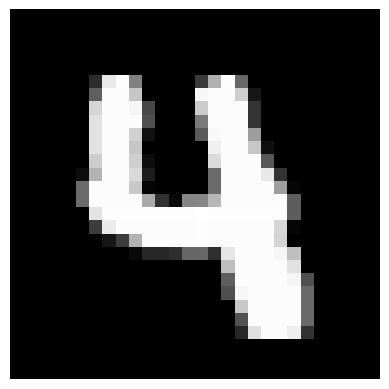

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Tahmin Edilen Sınıf: 4 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9999986886978149 

Diğer Sınıfların Olasılık Değerleri: 
[[1.0104008e-13 6.3724030e-12 7.4284513e-13 4.0998191e-11 9.9999869e-01
  2.1462194e-09 1.4885142e-11 7.4283957e-09 1.7383618e-07 1.1706284e-06]]


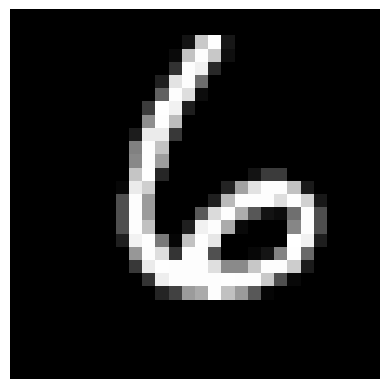

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tahmin Edilen Sınıf: 6 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9999996423721313 

Diğer Sınıfların Olasılık Değerleri: 
[[1.1656770e-09 6.9208299e-11 3.3239111e-09 2.7654913e-13 3.3465804e-07
  2.3594620e-09 9.9999964e-01 8.6038598e-13 7.0895491e-11 1.8088077e-12]]


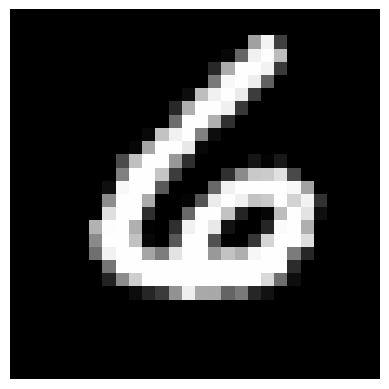

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tahmin Edilen Sınıf: 6 

Tahmin Edilen Sınıfın Olasılık Değeri: 1.0 

Diğer Sınıfların Olasılık Değerleri: 
[[3.0673936e-12 3.2996731e-14 4.3277220e-13 9.7760879e-12 2.1495037e-09
  3.4815106e-09 1.0000000e+00 8.7318145e-15 9.4187916e-14 9.8704322e-14]]


In [49]:
import random
for i in range(8):
    predicted_class=prediction()